# Lead Scoring Case Study : Logistic Regression Model

## Problem Statement
### Overview

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

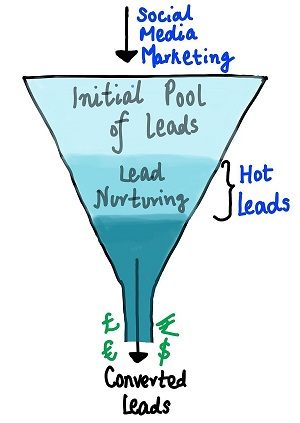

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


### Dataset

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. 

The target variable, in this case, is the column `Converted` which tells whether a past lead was converted or not wherein `1` means it was converted and `0` means it wasn’t converted. 

Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.


### Goals of the case study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Model Building Steps

The Logistic Regression model building broadly consists of the following steps:

- Step 1: Importing necessary libraries
- Step 2: Reading and understanding the data
- Step 3: Data cleaning
- Step 4: Exploratory data analysis
- Step 5: Data preparation
- Step 6: Model building
- Step 7: Model Evaluation
- Step 8: Making prediction on the test data
- Step 9: Model summary report
- Step 10: Recommendations

## Step 1: Importing Necessary Libraries

In [1]:
# For reading and visualising data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# For train-test split operation using sklearn
from sklearn.model_selection import train_test_split

# For performing StandardScaler scaling using sklearn
from sklearn.preprocessing  import StandardScaler

# For performing RFE and LogisticRegression using sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# For building model using statsmodels
import statsmodels.api as sm

# For checking VIF using statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For generating the confusion metrix using sklearn
from sklearn import metrics

# For calculating precision and recall using sklearn
from sklearn.metrics import precision_score, recall_score

# For precision-recall trade-off curve using sklearn
from sklearn.metrics import precision_recall_curve

## Step 2: Reading and Understanding Data

In [2]:
# Reading the CSV file "Leads.csv" into dataframe "df"
df = pd.read_csv("Leads.csv")

# First five rows of the data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# shape of the data
df.shape

(9240, 37)

In [4]:
# info of the data to check nulls and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# check the stats
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# check for null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### Observation

- We have total 9240 rows and 37 columns in the dataset.
- All datatypes are in correct format. No need to change.
- Many columns are having null values.
- There are many categorical variable having `select` as level. This need to handle.

## Step 3: Data Cleaning

### 3.1. Handling the select level

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.
This may caused due to the customer didn't select any option from that category list, so it is showing as select.
Let's convert these Select values to NULL values.

In [7]:
# converting the Select values to NULL values
df = df.replace('Select', np.nan)

In [8]:
# Now check the null count in columns
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# check the null percentage
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

#### Observation
we see that some columns having very high percentage of null values. So, better to drop those columns. Let's drop the columns having more than 40% nulls.

In [10]:
# droping the columns having null percentage more than 40

df = df.drop(columns= ['Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'Lead Profile', 'Lead Quality', 'How did you hear about X Education'])

In [11]:
# again checking the null percerntage after removing the columns
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

### 3.2. Visualizing the columns having high NULL percentage

Visualizing the distribution of values using countplot for the columns having high missing values.

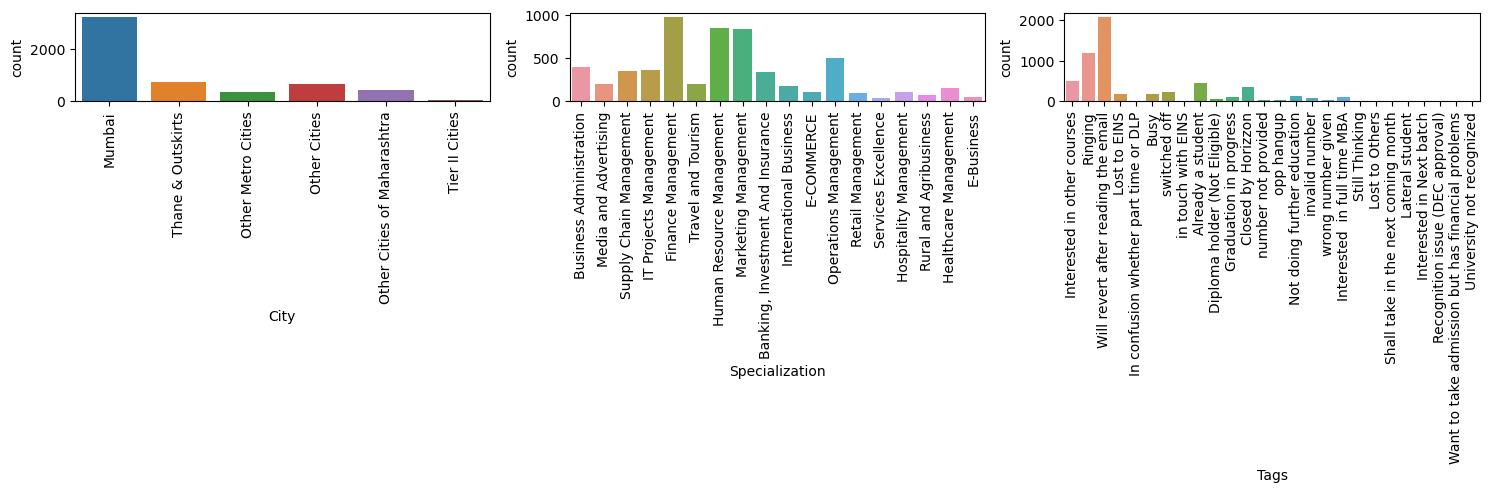

In [12]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

#plot for distribution of city column
sns.countplot(x= 'City', data=df, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

#plot for distribution of Specialization column
sns.countplot(x= 'Specialization', data=df, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)

#plot for distribution of Tags column
sns.countplot(x= 'Tags', data=df, ax=axes[2])
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### Observation

- Column `City` has 40% missing values. As most of the values are 'Mumbai', so we can impute this value in the missing one.
- Column `Specialization` has 37% missing values. Since from the distribution we cannot find any value significant. So, it may be possible that missing values generated in this column due to the person didn't find his specialization option. We can create an additional option as 'Other' and impute this in the missing values.
- Column `Tags` has 36% missing values. As most of the values are 'Will revert after reading the email', so we can impute this value in the missing one.

In [13]:
# impute "Mumbai" in missing values of column "City"
df['City'] = df['City'].replace(np.nan, 'Mumbai')

In [14]:
# impute "Other" in missing values of column "Specialization"
df['Specialization'] = df['Specialization'].replace(np.nan, 'Other')

In [15]:
# impute "Will revert after reading the email" in missing values of column "Tags"
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

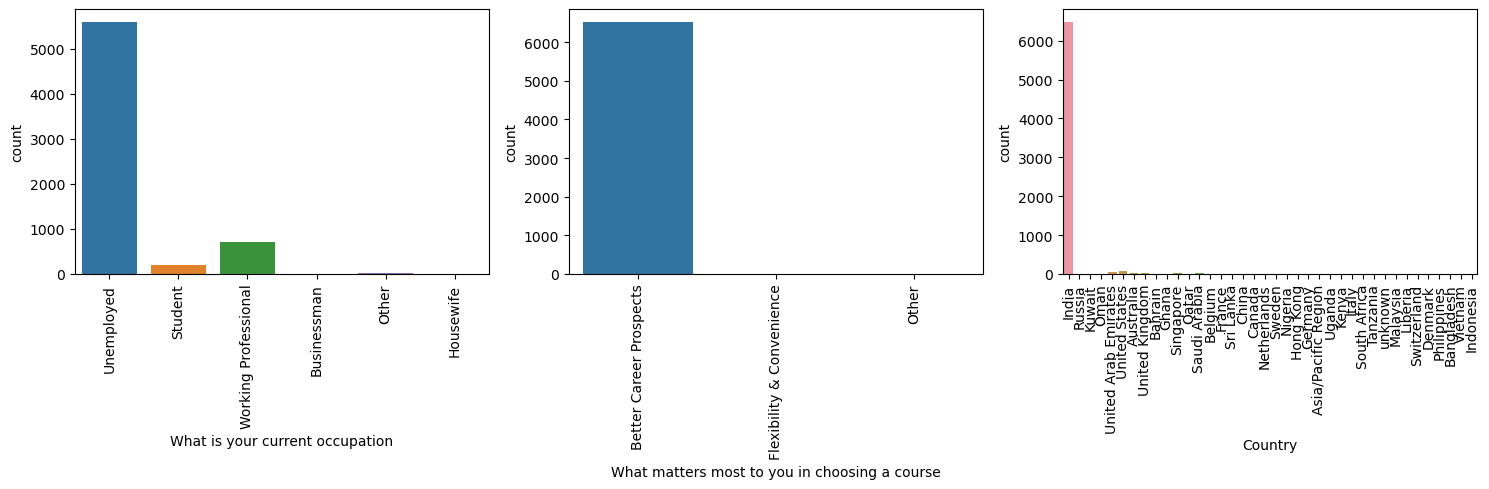

In [16]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

#plot for distribution of 'What is your current occupation' column
sns.countplot(x= 'What is your current occupation', data=df, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

#plot for distribution of 'What matters most to you in choosing a course' column
sns.countplot(x= 'What matters most to you in choosing a course', data=df, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)

#plot for distribution of 'Country' column
sns.countplot(x= 'Country', data=df, ax=axes[2])
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### Observation
- Column 'What is your current occupation' having 29% missing values. As most of the values are 'Unemployed', so we can impute this value in the missing one.
- Column 'What matters most to you in choosing a course' having 29% missing values. This is very highly skwed. Better to drop this column.
- Column 'Country' having 27% missing values. As most of the values are 'India', so we can impute this value in the missing one.

In [17]:
# impute "Unemployed" in missing values of column "What is your current occupation"
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [18]:
# Droping column 'What matters most to you in choosing a course'
df = df.drop('What matters most to you in choosing a course', axis=1)

In [19]:
# impute "India" in missing values of column "Country"
df['Country'] = df['Country'].replace(np.nan, 'India')

### 3.3. Remaining missing values
After major high missing value columns treatment again looking at the data for remaining missing values

In [20]:
# check the null percentage
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

It seems now we are having missing values in three columns with 1%. better to drop those rows.

In [21]:
# Dropping the rows with NULLs
df.dropna(inplace=True)

In [22]:
# check the null percentage
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [23]:
# current shape of the data
df.shape

(9074, 29)

Now, we don't have any missing values in our data. We are good to go for further analysis. We are having 9074 rows available with us, meaning 9074/9240 = 98.2% data available with us.

## Step 4: Exploratory Data Analysis

The target variable, in this case, is the column `Converted` which tells whether a past lead was converted or not wherein `1` means it was converted and `0` means it wasn’t converted.

In [24]:
# Lead convertion Rate
conv_rate = round(sum(df['Converted'])/len(df['Converted'].index),2)*100
print("We have almost Lead convertion rate percentage of ", conv_rate)

We have almost Lead convertion rate percentage of  38.0


In [25]:
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened


### 4.1. Visualising the Numerical Variables
Lets visualise the numerical variables and check for any outliers

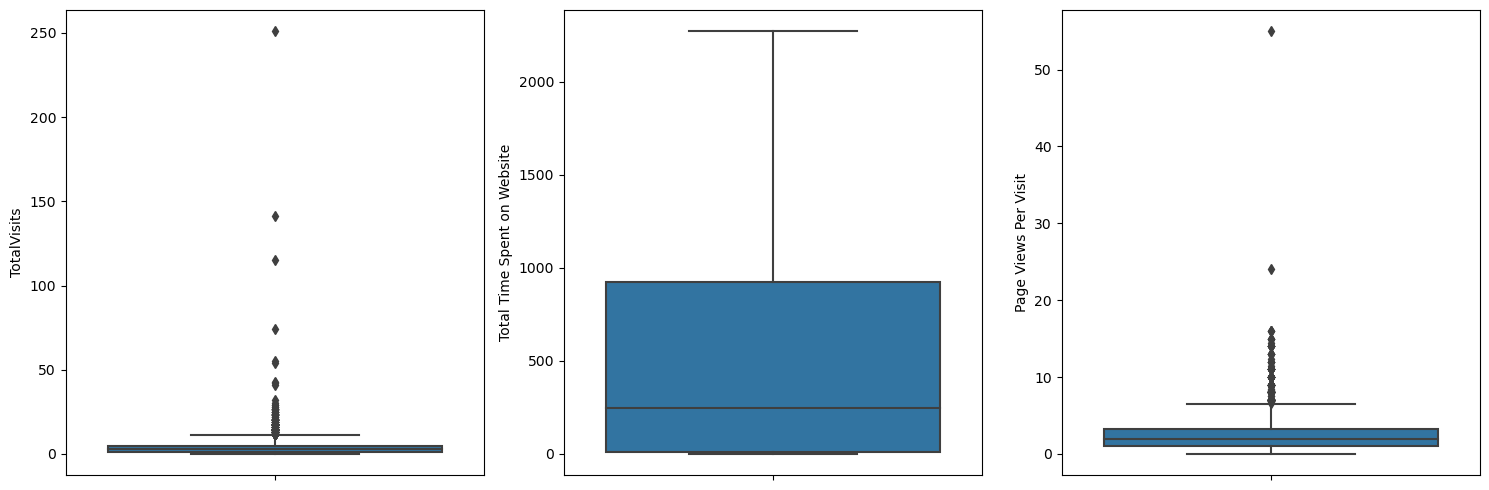

In [26]:
# check boxplot for numerical variables
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(y= df['TotalVisits'], data =df, orient='vert', ax=axes[0])
sns.boxplot(y= df['Total Time Spent on Website'], data =df, orient='vert', ax=axes[1])
sns.boxplot(y= df['Page Views Per Visit'], data =df, orient='vert', ax=axes[2])

plt.tight_layout()
plt.show()

#### Observation
- There are outliers present in column `TotalVisists`. 
- Data is OK for `Total Time Spent on Website`. No outliers.
- There are outliers present in column `Page Views Per Visit`.

In [27]:
# Taking upto 95 percentile values for analysis for column "TotalVisits"
percentile = df['TotalVisits'].quantile([0.05, 0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentile[0]] = percentile[0]
df['TotalVisits'][df['TotalVisits'] >= percentile[1]] = percentile[1]

In [28]:
# Taking upto 95 percentile values for analysis for column "Page Views Per Visit"
percentile = df['Page Views Per Visit'].quantile([0.05, 0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentile[0]] = percentile[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentile[1]] = percentile[1]

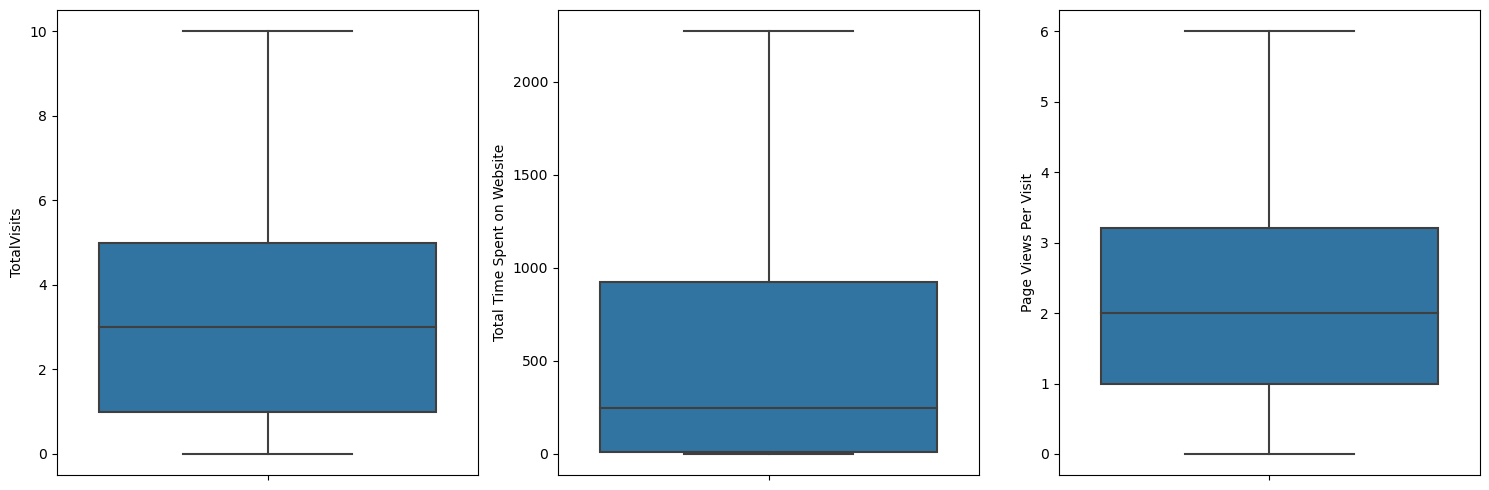

In [29]:
# Again checking the boxplots for numerical variables
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(y= df['TotalVisits'], data =df, orient='vert', ax=axes[0])
sns.boxplot(y= df['Total Time Spent on Website'], data =df, orient='vert', ax=axes[1])
sns.boxplot(y= df['Page Views Per Visit'], data =df, orient='vert', ax=axes[2])

plt.tight_layout()
plt.show()

Now the data is OK. No Outliers.

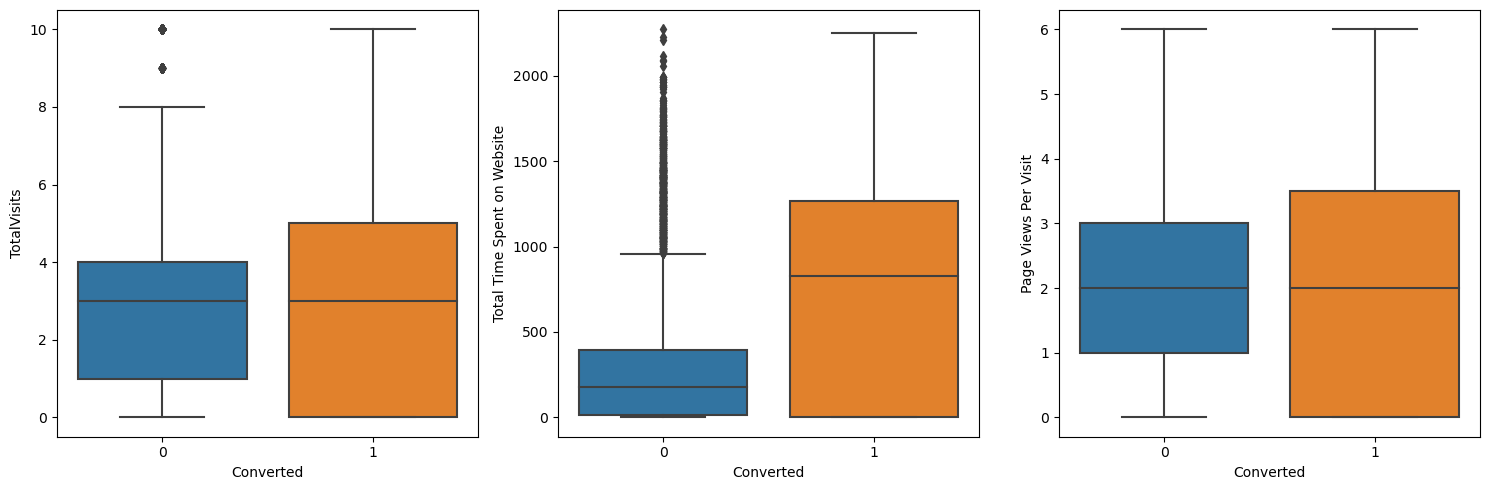

In [30]:
# check the numerical variable with converted
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(y= df['TotalVisits'], x= 'Converted', data =df, orient='vert', ax=axes[0])
sns.boxplot(y= df['Total Time Spent on Website'], x= 'Converted', data =df, orient='vert', ax=axes[1])
sns.boxplot(y= df['Page Views Per Visit'], x= 'Converted', data =df, orient='vert', ax=axes[2])

plt.tight_layout()
plt.show()

#### Observation
- Median seems to be same for converted and not converted in case of `TotalVisits` and `Page Views Per Visit`.
- It seems that `Total Time Spent on Website` has good impact on lead convetion. Leads spending more time on website tends to convert more.

### 4.2. Visualising the Categorical Variables
Lets visualise the categorical variables and their impact on lead convertion

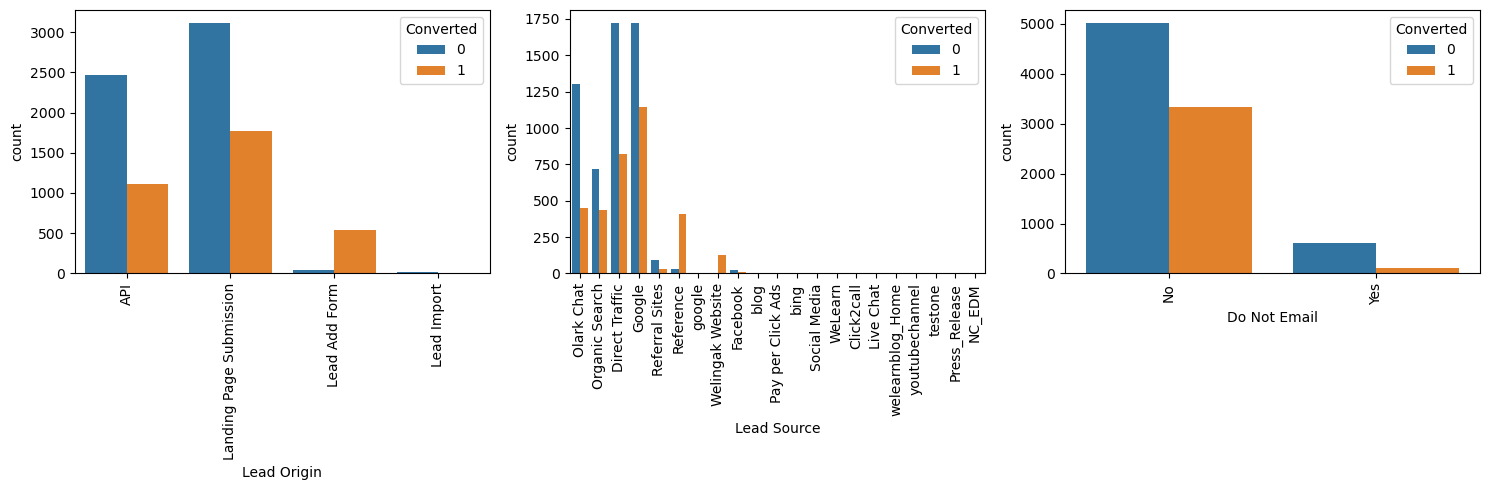

In [31]:
# check the categorical variable vs lead converted one by one
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x= 'Lead Origin', hue= 'Converted', data=df, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(x= 'Lead Source', hue= 'Converted', data=df, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)

sns.countplot(x= 'Do Not Email', hue= 'Converted', data=df, ax=axes[2])
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### Observation
- "Lead Origin" - "API" and "Landing page submission" have considerable lead convertion rate. Lead add form is also having good convertion rate.
- "Lead Sources" - Google and Direct Traffic have high convertion rate. Convertion rate through reference and welingak website is also good.
- "Do Not Email" -  no inference can be drawn as maximum are No.

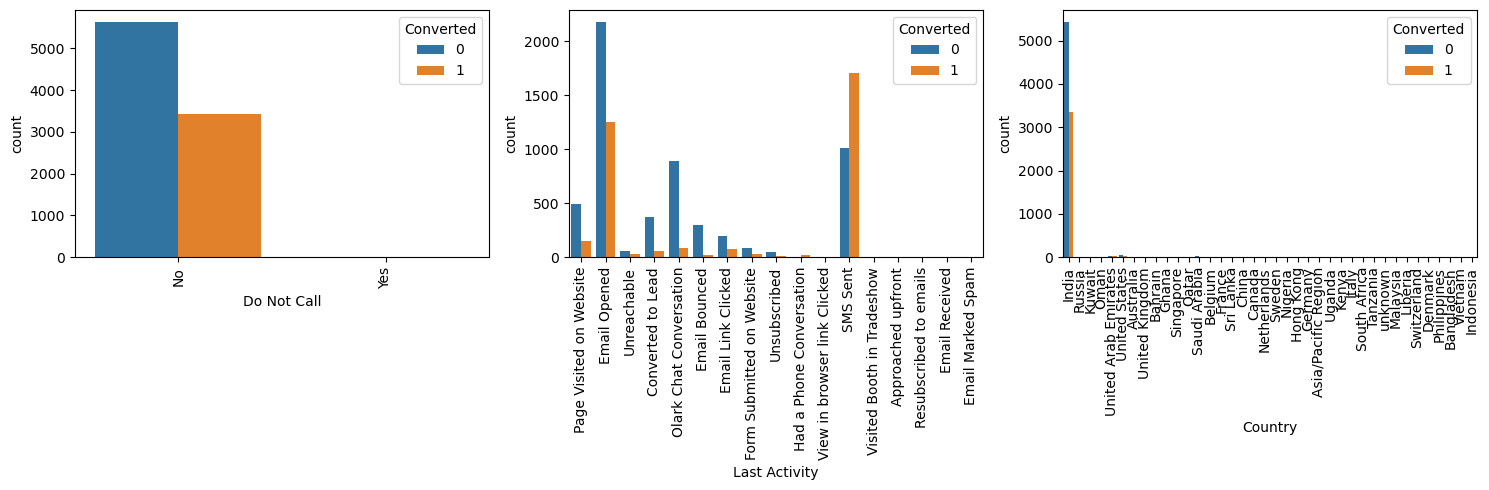

In [32]:
# check the categorical variable vs lead converted one by one
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x= 'Do Not Call', hue= 'Converted', data=df, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(x= 'Last Activity', hue= 'Converted', data=df, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)

sns.countplot(x= 'Country', hue= 'Converted', data=df, ax=axes[2])
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### Observation
- "Do Not Call" - No inference can be made as maximum are No.
- "Last Activity" - Email opened and SMS sent have good convertion rate.
- "Country" - No inference can be made as maximum are India.

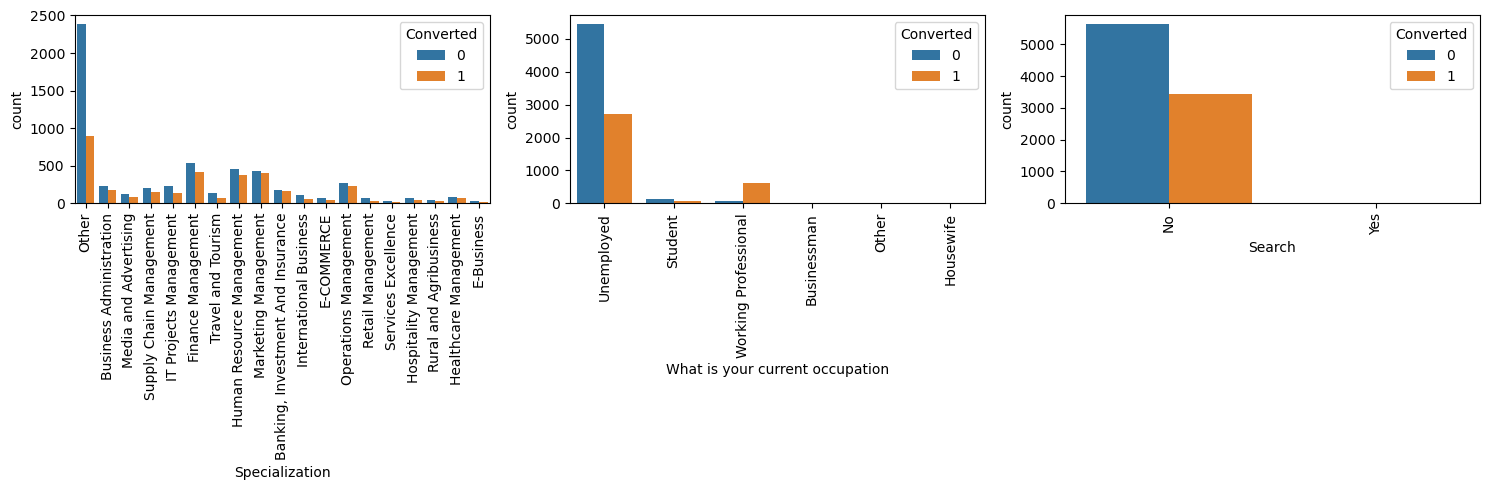

In [33]:
# check the categorical variable vs lead converted one by one
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x= 'Specialization', hue= 'Converted', data=df, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(x= 'What is your current occupation', hue= 'Converted', data=df, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)

sns.countplot(x= 'Search', hue= 'Converted', data=df, ax=axes[2])
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### Observation
- "Specialization" - Overall have high convertion rate.
- "What is your current occupation" - Unemployed and working professionals have high convertion rate.
- "Search" - No inference can be made as maximum are No.

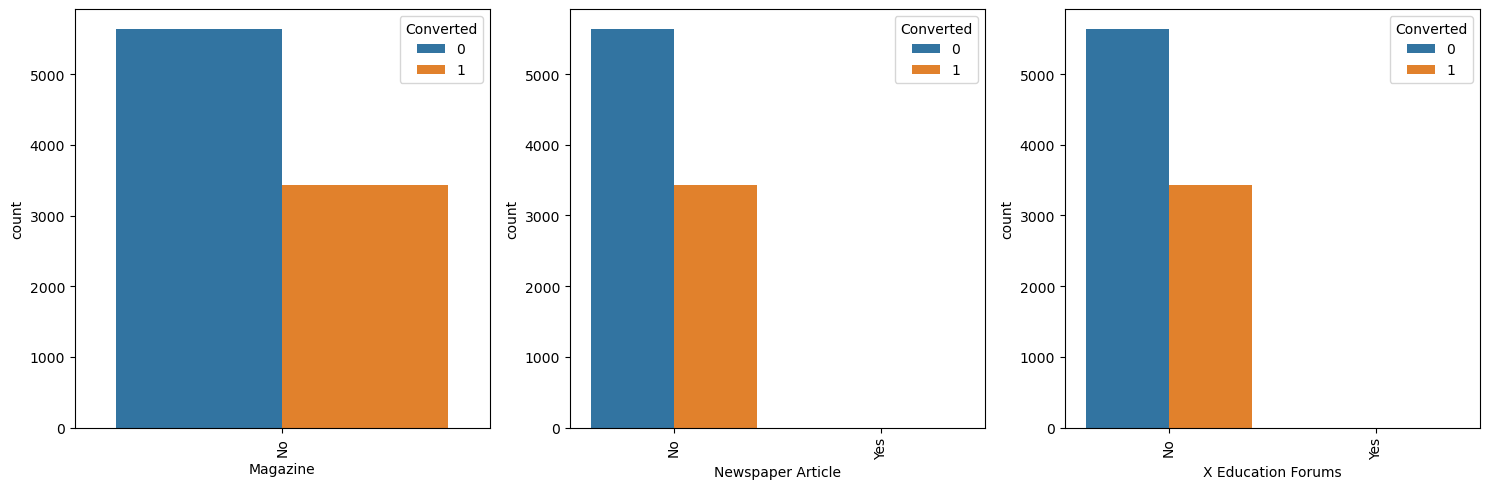

In [34]:
# check the categorical variable vs lead converted one by one
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x= 'Magazine', hue= 'Converted', data=df, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(x= 'Newspaper Article', hue= 'Converted', data=df, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)

sns.countplot(x= 'X Education Forums', hue= 'Converted', data=df, ax=axes[2])
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### Observation
- "Magazine" - No inference can be made as maximum are No.
- "Newspaper Article" - No inference can be made as maximum are No.
- "X Education Forums" - No inference can be made as maximum are No.

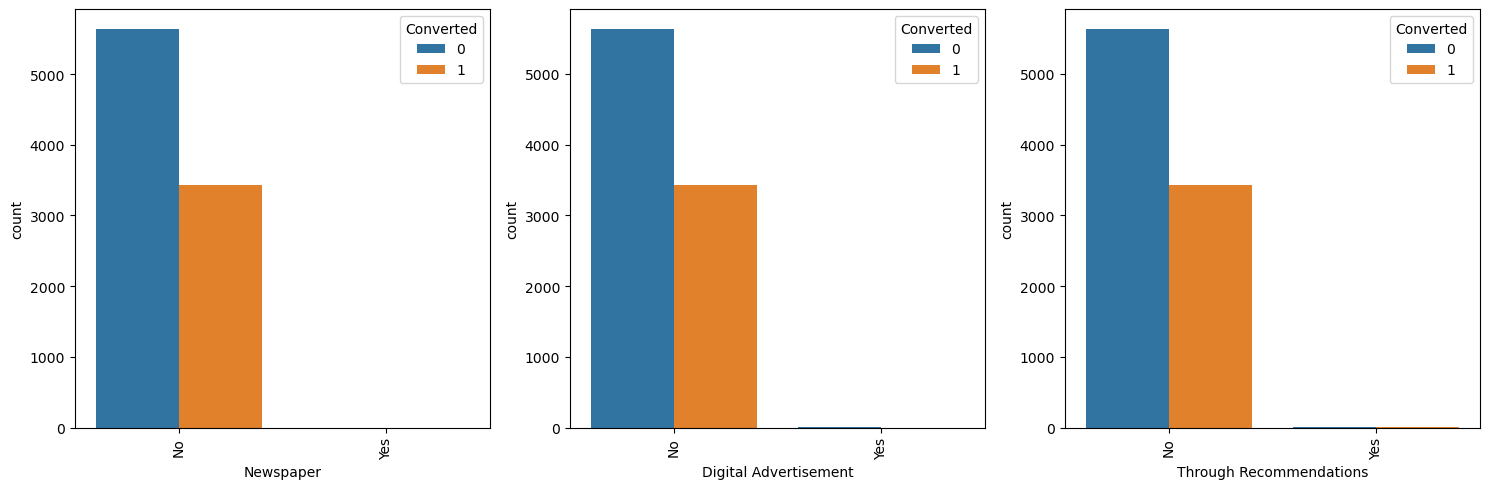

In [35]:
# check the categorical variable vs lead converted one by one
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x= 'Newspaper', hue= 'Converted', data=df, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(x= 'Digital Advertisement', hue= 'Converted', data=df, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)

sns.countplot(x= 'Through Recommendations', hue= 'Converted', data=df, ax=axes[2])
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### Observation
- "Newspaper" - No inference can be made as maximum are No.
- "Digital Advertisement" - No inference can be made as maximum are No.
- "Through Recommendations" - No inference can be made as maximum are No.

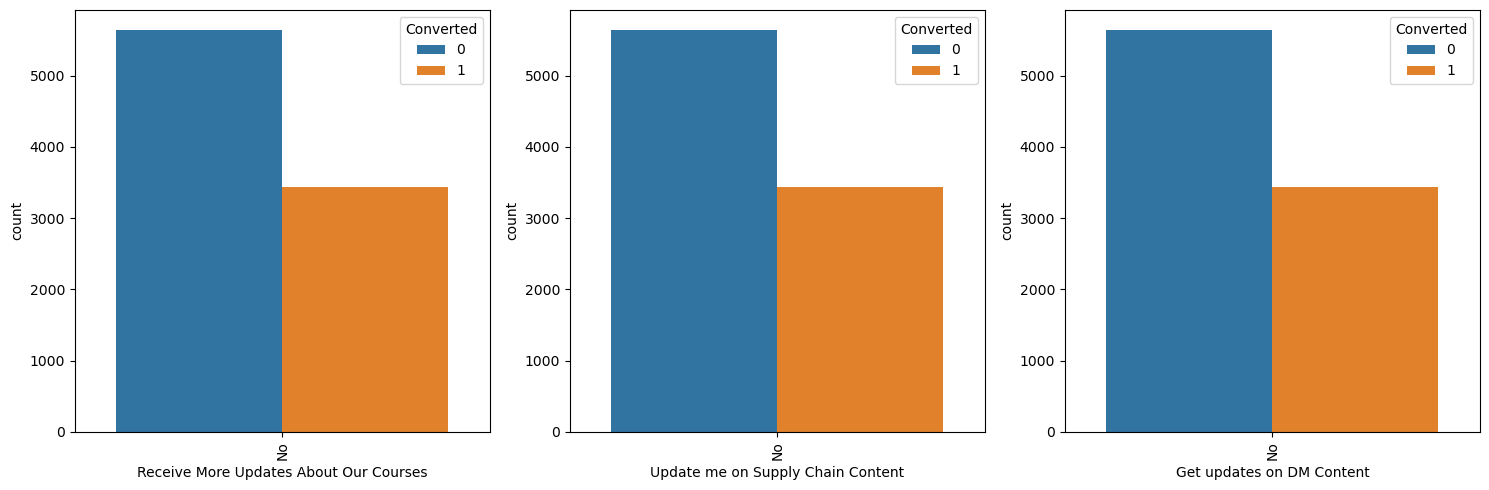

In [36]:
# check the categorical variable vs lead converted one by one
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x= 'Receive More Updates About Our Courses', hue= 'Converted', data=df, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(x= 'Update me on Supply Chain Content', hue= 'Converted', data=df, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)

sns.countplot(x= 'Get updates on DM Content', hue= 'Converted', data=df, ax=axes[2])
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### Observation
- "Receive More Updates About Our Courses" - No inference can be made as maximum are No.
- "Update me on Supply Chain Content" - No inference can be made as maximum are No.
- "Get updates on DM Content" - No inference can be made as maximum are No.

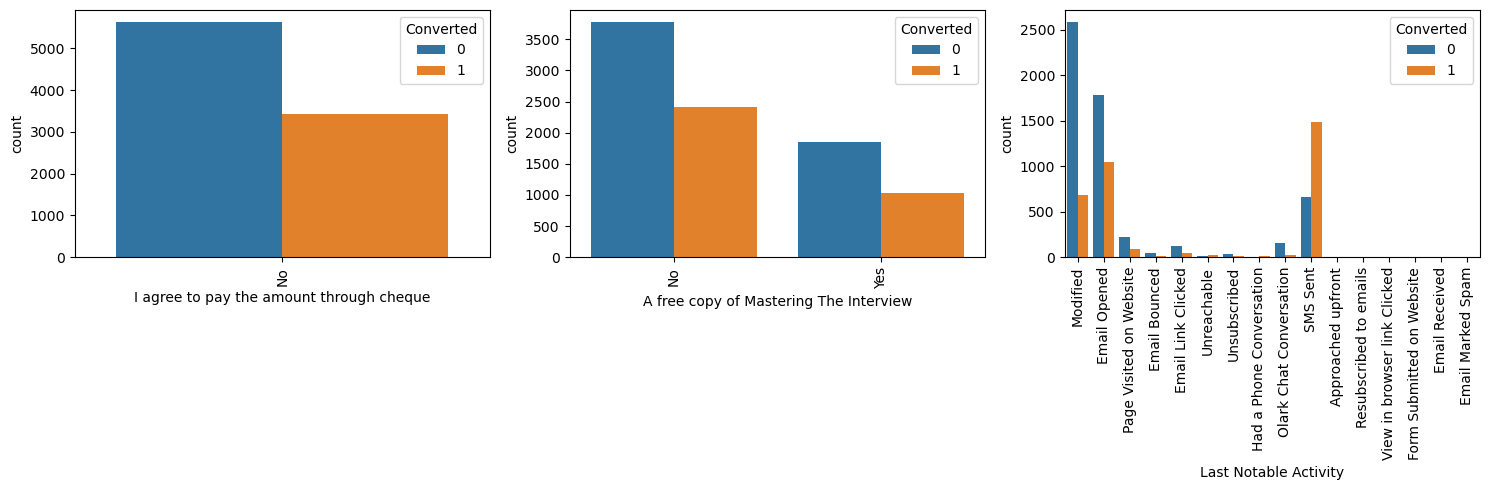

In [37]:
# check the categorical variable vs lead converted one by one
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x= 'I agree to pay the amount through cheque', hue= 'Converted', data=df, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(x= 'A free copy of Mastering The Interview', hue= 'Converted', data=df, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)

sns.countplot(x= 'Last Notable Activity', hue= 'Converted', data=df, ax=axes[2])
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### Observation
- "I agree to pay the amount through cheque" - No inference can be made as maximum are No.
- "A free copy of Mastering The Interview" - No inference can be made as maximum are No.
- "Last Notable Activity" - SMS sent seems to have more convertion rate.

Based on the above analysis we found that there are many columns which is not adding any value to the lead convertion. So better to drop them.

In [38]:
df = df.drop(['Lead Number', 'Country', 'Search', 'Tags', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'], axis=1)

In [39]:
df.shape

(9074, 14)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

## Step 5: Data Preparation

### 5.1. Converting binary (Yes/No) variables to 1/0

In [41]:
df.head(3)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened


In [42]:
# converting Yes/No to 1/0
feature = ['Do Not Email', 'Do Not Call']

def conv_feature(x):
    return x.map({'Yes': 1, 'No': 0})

df[feature] = df[feature].apply(conv_feature)

### 5.2. Creating Dummy Variables
Let's create dummy variables for the categorical features 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'City', 'Last Notable Activity'.

In [43]:
#creating dummy variables for the features and droping the first 
dummy_features = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'City', 'Last Notable Activity']], drop_first=True, dtype=int)
dummy_features.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
# concat dummy_features to df
df = pd.concat([df, dummy_features], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [45]:
# dropping the original columns
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'City', 'Last Notable Activity'], axis=1)

In [46]:
df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### 5.3. Spliting the Data in Train and Test Set

In [47]:
# creating the features variable X 
X = df.drop(['Prospect ID', 'Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
#creating target variable y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [49]:
#spliting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 5.4. Re-Scaling of the features
Here we will use Standardisation for rescaling of the features using Sci-Kit Learn library.

In [50]:
#instintiating the scaler
scaler = StandardScaler()

#Standardisation of features using fit_transform
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

#head
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


### 5.5. Features Selection using RFE
Let's use RFE (Recursive Feature Elimination) from sci-kit learn for selecting the optimal features for our model 

In [51]:
#instintiate LogisticRegression
logreg = LogisticRegression()

#using RFE and taking 20 featutes
rfe = RFE(estimator=logreg, n_features_to_select=20)

#using RFE in train set
rfe = rfe.fit(X_train, y_train)

In [52]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False, False, False, False, False])

In [53]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 59),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_NC_EDM', False, 21),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 47),
 ('Lead Source_Press_Release', False, 45),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 24),
 ('Lead Source_WeLearn', False, 68),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 51),
 ('Lead Source_blog', False, 25),
 ('Lead Source_google', False, 13),
 ('Lead Source_testone', False,

In [54]:
#Lets see the columns selected by rfe
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Other',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

## Step 6: Model Building
We will use statsmodels for model building process as its summary report is good for analysis purpose.

### 6.1. Model 1

In [55]:
#Model buidiling using statsmodels and chcek model summary
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.3
Date:                Sun, 19 May 2024   Deviance:                       5220.5
Time:                        21:23:08   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7505      0.131     13.363      0.000       1.494       2.007
Do Not Email                                            -1.5499      0.201     -7.728      0.000      -1.943      -1.157
Total Time Spent on Website                              0.9924      0.037     26.503      0.000       0.919       1.066
Lead Origin_Landing Page Submission                     -1.3155      0.127    -10.333      0.000      -1.565      -1.066
Lead Origin_Lead Add Form                                2.6767      0.227     11.774      0.000       2.231       3.122
Lead Source_Direct Traffic                              -0.3613      0.091     -3.950      0.000      -0.541      -0.182
Lead Source_Organic Search                              -0.4014      0.109     -3.691      0.000      -0.614      -0.188
Lead Source_Referral Sites                              -0.7305      0.331     -2.206      0.027      -1.379      -0.081
Lead Source_Welingak Website                             2.6054      0.758      3.437      0.001       1.120       4.091
Last Activity_Converted to Lead                         -1.0874      0.226     -4.819      0.000      -1.530      -0.645
Last Activity_Email Bounced                             -1.1792      0.431     -2.736      0.006      -2.024      -0.335
Last Activity_Had a Phone Conversation                   1.6815      0.783      2.148      0.032       0.147       3.216
Last Activity_Olark Chat Conversation                   -1.1585      0.196     -5.901      0.000      -1.543      -0.774
Specialization_Other                                    -1.0362      0.124     -8.381      0.000      -1.278      -0.794
What is your current occupation_Housewife               22.7967   1.52e+04      0.001      0.999   -2.98e+04    2.99e+04
What is your current occupation_Working Professional     2.6151      0.194     13.489      0.000       2.235       2.995
Last Notable Activity_Email Link Clicked                -1.7728      0.258     -6.864      0.000      -2.279      -1.267
Last Notable Activity_Email Opened                      -1.4429      0.088    -16.357      0.000      -1.616      -1.270
Last Notable Activity_Modified                          -1.7823      0.100    -17.739      0.000      -1.979      -1.585
Last Notable Activity_Olark Chat Conversation           -1.4551      0.376     -3.875      0.000      -2.191      -0.719
Last Notable Activity_Page Visited on Website           -1.7352      0.199     -8.732      0.000      -2.125      -1.346
========================================================================================================================
"""

#### Observation
- P-value of "What is your current occupation_Housewife" is very high. Better to drop this.

In [56]:
#Droping column 'What is your current occupation_Housewife'
col_updated = col.drop('What is your current occupation_Housewife')

### 6.2. Model 2

In [57]:
#Model buidiling using statsmodels and chcek model summary
X_train_sm = sm.add_constant(X_train[col_updated])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.6
Date:                Sun, 19 May 2024   Deviance:                       5229.2
Time:                        21:23:25   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3993
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7503      0.131     13.368      0.000       1.494       2.007
Do Not Email                                            -1.5512      0.201     -7.734      0.000      -1.944      -1.158
Total Time Spent on Website                              0.9916      0.037     26.513      0.000       0.918       1.065
Lead Origin_Landing Page Submission                     -1.3156      0.127    -10.344      0.000      -1.565      -1.066
Lead Origin_Lead Add Form                                2.6930      0.227     11.858      0.000       2.248       3.138
Lead Source_Direct Traffic                              -0.3605      0.091     -3.945      0.000      -0.540      -0.181
Lead Source_Organic Search                              -0.3919      0.108     -3.612      0.000      -0.605      -0.179
Lead Source_Referral Sites                              -0.7291      0.331     -2.203      0.028      -1.378      -0.080
Lead Source_Welingak Website                             2.5910      0.758      3.418      0.001       1.105       4.077
Last Activity_Converted to Lead                         -1.0875      0.226     -4.821      0.000      -1.530      -0.645
Last Activity_Email Bounced                             -1.1779      0.431     -2.734      0.006      -2.022      -0.333
Last Activity_Had a Phone Conversation                   1.6792      0.783      2.145      0.032       0.145       3.214
Last Activity_Olark Chat Conversation                   -1.1563      0.196     -5.890      0.000      -1.541      -0.772
Specialization_Other                                    -1.0413      0.124     -8.429      0.000      -1.283      -0.799
What is your current occupation_Working Professional     2.6103      0.194     13.462      0.000       2.230       2.990
Last Notable Activity_Email Link Clicked                -1.7639      0.257     -6.862      0.000      -2.268      -1.260
Last Notable Activity_Email Opened                      -1.4356      0.088    -16.290      0.000      -1.608      -1.263
Last Notable Activity_Modified                          -1.7813      0.100    -17.733      0.000      -1.978      -1.584
Last Notable Activity_Olark Chat Conversation           -1.4536      0.376     -3.871      0.000      -2.190      -0.718
Last Notable Activity_Page Visited on Website           -1.7344      0.199     -8.729      0.000      -2.124      -1.345
========================================================================================================================
"""

In [58]:
#Checking the VIF 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_updated].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_updated].values, i) for i in range(X_train[col_updated].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.41
16,Last Notable Activity_Modified,2.71
12,Specialization_Other,2.15
4,Lead Source_Direct Traffic,2.14
11,Last Activity_Olark Chat Conversation,1.94
0,Do Not Email,1.86
15,Last Notable Activity_Email Opened,1.85
9,Last Activity_Email Bounced,1.76
3,Lead Origin_Lead Add Form,1.54
7,Lead Source_Welingak Website,1.37


#### Observation
- Dropping 'Lead Source_Referral Sites' due to its relatively high P-value.

In [59]:
#Droping column 'Lead Source_Referral Sites'
col_updated = col_updated.drop('Lead Source_Referral Sites')

### 6.3. Model 3

In [60]:
#Model buidiling using statsmodels and chcek model summary
X_train_sm = sm.add_constant(X_train[col_updated])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.3
Date:                Sun, 19 May 2024   Deviance:                       5234.5
Time:                        21:23:44   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3988
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7410      0.131     13.313      0.000       1.485       1.997
Do Not Email                                            -1.5534      0.201     -7.737      0.000      -1.947      -1.160
Total Time Spent on Website                              0.9886      0.037     26.480      0.000       0.915       1.062
Lead Origin_Landing Page Submission                     -1.3121      0.127    -10.325      0.000      -1.561      -1.063
Lead Origin_Lead Add Form                                2.7098      0.227     11.935      0.000       2.265       3.155
Lead Source_Direct Traffic                              -0.3492      0.091     -3.827      0.000      -0.528      -0.170
Lead Source_Organic Search                              -0.3756      0.108     -3.470      0.001      -0.588      -0.163
Lead Source_Welingak Website                             2.5962      0.758      3.425      0.001       1.110       4.082
Last Activity_Converted to Lead                         -1.0862      0.225     -4.824      0.000      -1.527      -0.645
Last Activity_Email Bounced                             -1.1691      0.431     -2.713      0.007      -2.014      -0.325
Last Activity_Had a Phone Conversation                   1.6456      0.789      2.086      0.037       0.099       3.192
Last Activity_Olark Chat Conversation                   -1.1566      0.197     -5.881      0.000      -1.542      -0.771
Specialization_Other                                    -1.0539      0.123     -8.542      0.000      -1.296      -0.812
What is your current occupation_Working Professional     2.6017      0.194     13.409      0.000       2.221       2.982
Last Notable Activity_Email Link Clicked                -1.7705      0.257     -6.898      0.000      -2.274      -1.267
Last Notable Activity_Email Opened                      -1.4378      0.088    -16.324      0.000      -1.610      -1.265
Last Notable Activity_Modified                          -1.7880      0.100    -17.816      0.000      -1.985      -1.591
Last Notable Activity_Olark Chat Conversation           -1.4361      0.376     -3.823      0.000      -2.172      -0.700
Last Notable Activity_Page Visited on Website           -1.7497      0.199     -8.805      0.000      -2.139      -1.360
========================================================================================================================
"""

In [61]:
#Checking the VIF 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_updated].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_updated].values, i) for i in range(X_train[col_updated].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.41
15,Last Notable Activity_Modified,2.70
4,Lead Source_Direct Traffic,2.13
11,Specialization_Other,2.13
10,Last Activity_Olark Chat Conversation,1.94
0,Do Not Email,1.86
14,Last Notable Activity_Email Opened,1.84
8,Last Activity_Email Bounced,1.76
3,Lead Origin_Lead Add Form,1.53
6,Lead Source_Welingak Website,1.37


Now, since VIF and P-value are under considerable limit. We can finalize the our model as model3 and make prediction.

### 6.4. Making Prediction on the Train Set

In [62]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.179980
1012    0.163989
9226    0.121382
4750    0.846102
7987    0.571105
1281    0.791704
2880    0.132370
4971    0.973997
7536    0.794336
1248    0.532094
dtype: float64

In [63]:
#Reshaping into array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17998047, 0.16398851, 0.12138184, 0.84610211, 0.57110503,
       0.79170353, 0.13237001, 0.97399686, 0.79433614, 0.53209421])

In [64]:
#Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.179980,3009
1,0,0.163989,1012
2,0,0.121382,9226
3,1,0.846102,4750
4,1,0.571105,7987


In [65]:
#Taking an arbitary cut-off probability of 0.5

#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.179980,3009,0
1,0,0.163989,1012,0
2,0,0.121382,9226,0
3,1,0.846102,4750,1
4,1,0.571105,7987,1


In [66]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3464  441]
 [ 796 1650]]


In [67]:
# Let's check the overall accuracy.
print('Model Accuracy :', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Model Accuracy : 0.805227523224689


#### Metrics beyond simply accuracy

In [68]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [69]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :', TP / float(TP+FN))

Sensitivity : 0.6745707277187244


In [70]:
# Let us calculate specificity
print('Specificity :', TN / float(TN+FP))

Specificity : 0.887067861715749


In [71]:
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Postive Rate', FP/ float(TN+FP))

False Postive Rate 0.11293213828425096


In [72]:
# positive predictive value 
print ('Positive Predictive Value :', TP / float(TP+FP))

Positive Predictive Value : 0.7890961262553802


In [73]:
# Negative predictive value
print ('Negative Predictive Value :', TN / float(TN+ FN))

Negative Predictive Value : 0.8131455399061033


#### observation
We got good specicificity of 88% but sensitivity is low 67%. This may caused due to the arbitrarily choosed cut-off 0.5. Now, let's plot the ROC curve in order to get the optimum cut-off value.

#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [74]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [75]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

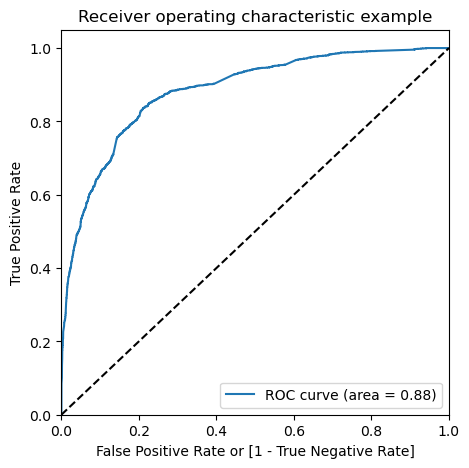

In [76]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

As seen from the above ROC curve, since we got higher(0.88) area under the ROC curve, therefore our model is a good one.

#### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [77]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.179980,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.163989,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.121382,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.846102,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.571105,7987,1,1,1,1,1,1,1,0,0,0,0


In [78]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.575342  0.979150  0.322407
0.2   0.2  0.760195  0.889616  0.679129
0.3   0.3  0.798614  0.856092  0.762612
0.4   0.4  0.810581  0.790270  0.823303
0.5   0.5  0.805228  0.674571  0.887068
0.6   0.6  0.802078  0.600572  0.928297
0.7   0.7  0.787435  0.528618  0.949552
0.8   0.8  0.763187  0.430908  0.971319
0.9   0.9  0.714691  0.276778  0.988988


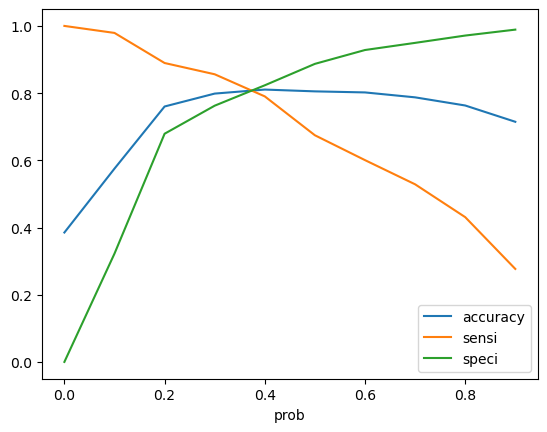

In [79]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Observation
- From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [80]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.179980,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.163989,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.121382,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.846102,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.571105,7987,1,1,1,1,1,1,1,0,0,0,0,1


#### Assigning Lead Score to the Train dataset

In [81]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.179980,3009,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.163989,1012,0,1,1,0,0,0,0,0,0,0,0,0,16
2,0,0.121382,9226,0,1,1,0,0,0,0,0,0,0,0,0,12
3,1,0.846102,4750,1,1,1,1,1,1,1,1,1,1,0,1,85
4,1,0.571105,7987,1,1,1,1,1,1,1,0,0,0,0,1,57


## Step 7: Model Evalution

### 7.1. Acuracy, Sensitivity and Specificity of Model

Lets calculate our final accuracy, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value and Negative predictive value.

In [82]:
# Let's check the overall accuracy.
print('Accuracy :', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8056998897811368


In [83]:
#confusion metrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3138,  767],
       [ 467, 1979]], dtype=int64)

In [84]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [85]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :', TP / float(TP+FN))

Sensitivity : 0.8090760425183974


In [86]:
# Let us calculate specificity
print('Specificity :', TN / float(TN+FP))

Specificity : 0.803585147247119


In [87]:
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Postive Rate :', FP/ float(TN+FP))

False Postive Rate : 0.19641485275288093


In [88]:
# Positive predictive value 
print ('Positive Predictive Value :', TP / float(TP+FP))

Positive Predictive Value : 0.7206846321922796


In [89]:
# Negative predictive value
print ('Negative predictive value :', TN / float(TN+ FN))

Negative predictive value : 0.8704576976421636


### 7.2. Precision and Recall of Model
- Precision - Also called "Positive Predictive Value", it refers to the percentage of result which are relevent.
- Recall - Also called "Sensitivity", it refers to the percentage of total relevant results correctly classified.


In [90]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3464,  441],
       [ 796, 1650]], dtype=int64)

In [91]:
#Precision : TP / TP + FP
print('Precision :', confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision : 0.7890961262553802


In [92]:
#Recall : TP / TP + FN
print('Recall :', confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6745707277187244


#### Using sklearn utilities for the same

In [93]:
print('Precision :', precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision : 0.7890961262553802


In [94]:
print('Recall :', recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6745707277187244


#### Precision and recall tradeoff

In [95]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [96]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

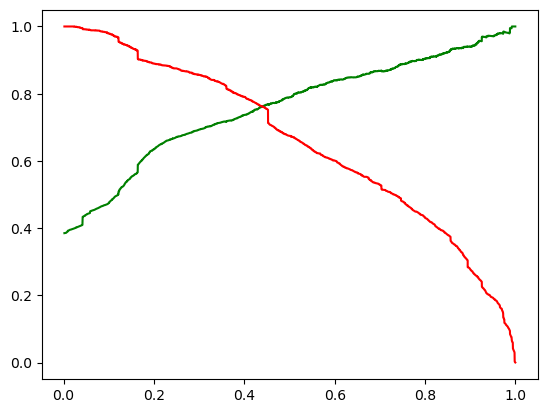

In [97]:
#plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 8: Making Prediction on the Test Set

### 8.1. Scaling the Test Data

In [98]:
#Standardisation of features using only transform
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

### 8.2. Model assement on Test Data

In [99]:
# Assigning the final model's selected columns
X_test = X_test[col_updated]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_Other,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,0,1.887326,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,0,-0.888650,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [100]:
# Adding the constant
X_test_sm = sm.add_constant(X_test)

#Making predictions on the test set
y_test_pred = result.predict(X_test_sm)

#checking
y_test_pred[:10]

3271    0.206788
1490    0.957284
7936    0.183180
4216    0.856225
3830    0.122863
1800    0.701019
6507    0.446297
4821    0.269035
4223    0.925425
4714    0.121382
dtype: float64

In [101]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [102]:
# Let's see the head
y_pred_1.head()

,0
3271,0.206788
1490,0.957284
7936,0.183180
4216,0.856225
3830,0.122863


In [103]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [104]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [105]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [106]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [107]:
#head
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.206788
1,1,1490,0.957284
2,0,7936,0.183180
3,1,4216,0.856225
4,0,3830,0.122863


In [108]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [109]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_Prob'])

In [110]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.206788
1,1490,1,0.957284
2,7936,0,0.183180
3,4216,1,0.856225
4,3830,0,0.122863


In [111]:
#mapping the cut-off prob 0.37
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [112]:
#head
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.206788,0
1,1490,1,0.957284,1
2,7936,0,0.183180,0
3,4216,1,0.856225,1
4,3830,0,0.122863,0


### 8.3. Model Evalution on Test Data
Here we will evaluate model accuracy, sensitivity and specificity for the Test Dataset.

In [113]:
# Let's check the overall accuracy.
print('Accuracy :', metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7983841351450606


In [114]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1396,  338],
       [ 211,  778]], dtype=int64)

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :', TP / float(TP+FN))

Sensitivity : 0.7866531850353893


In [117]:
# Let us calculate specificity
print('Specificity :', TN / float(TN+FP))

Specificity : 0.8050749711649365


### 8.4. Assigning the Lead Score to the Test Data

In [118]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,3271,0,0.206788,0,21
1,1490,1,0.957284,1,96
2,7936,0,0.183180,0,18
3,4216,1,0.856225,1,86
4,3830,0,0.122863,0,12


## Step 9: Model Summary Report
Lets check the detailed summary report of the model

### 9.1. Model performance summary report

Our final model is model3 logm3.
- When model run on the `Train` dataset, We got below evolution metrices - 
  - Accuracy : 80.5%
  - Sensitivity: 80.9%
  - Specificity: 80.3%
- After the model applied or run on the `Test` dataset, we got below evalution metrices -
  - Accuracy : 79.8%
  - Sensitivity: 78.6%
  - Specificity: 80.5%

Thus, we can say that our model is able to achieve a lead convertion rate of approx. 80%. And thus, succesfully acheived the X_Education company CEO's goal of getting a ballpack of the target lead convertion rate to be around 80%. The Model seems to predict the convertion rate very well and we should be able to give the company confidence in making good calls based on this model, to get a higher lead convertion rate of approx 80%.

### 9.2. Finding out the Potential Leads
- A lead score between 0 and 100 is assigned to each of the leads which can be used by the company to target potential leads. 
- A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- Here we are providing the leads with lead scores greater than 85, which will be definitely a hot lead. And the sales team can directly contact them, they are more prone to lead convertion.

In [119]:
lead_hot = y_pred_final.loc[y_pred_final['Lead_Score'] >= 85]
lead_hot

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
1,1490,1,0.957284,1,96
3,4216,1,0.856225,1,86
8,4223,1,0.925425,1,93
16,1946,1,0.868862,1,87
21,2461,1,0.994028,1,99
...,...,...,...,...,...
2686,8052,1,0.997921,1,100
2694,1566,1,0.950983,1,95
2699,6461,1,0.971043,1,97
2703,5741,1,0.890174,1,89


Thus there are 381 leads which can be contacted by the company and they are having high probabilities of getting converted.

### 9.3. Finding the Important features of our final model

In [120]:
result.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               2.709837
What is your current occupation_Working Professional    2.601719
Lead Source_Welingak Website                            2.596249
const                                                   1.741008
Last Activity_Had a Phone Conversation                  1.645616
Total Time Spent on Website                             0.988625
Lead Source_Direct Traffic                             -0.349170
Lead Source_Organic Search                             -0.375648
Specialization_Other                                   -1.053854
Last Activity_Converted to Lead                        -1.086152
Last Activity_Olark Chat Conversation                  -1.156572
Last Activity_Email Bounced                            -1.169146
Lead Origin_Landing Page Submission                    -1.312099
Last Notable Activity_Olark Chat Conversation          -1.436052
Last Notable Activity_Email Opened                     -1.437787
Do Not Email             

## Step 9: Recommandations

Following are few recommandations for better lead convertion -
- The company should contact the leads coming from "Lead Origin" as "Lead Add Form" as there is a high chance of lead convertion. On the other hand, leads coming from "Lead Origin" as "Landing Page Submission" is seen to have less chances lead convertion. So, company should improve these ares to attract more leads.
- The company should contact the leads with "occupation" as "Working Professionals" as there is a high chance of lead convertion.
- The company should contact the leads coming from "Lead Source" of "Welingak Website" as there is a high chance of lead convertion. And should improve "Lead Sources" of "Direct Traffic" and "Organic Search" since they have less chances lead convertion rate.
- The company should contact the leads having "Last Activit" as "Had a Phone Conversation" as there is a high chance of lead convertion.
- The company should contact the leads having high "Total Time Spent on Website" as there is a high chance of lead convertion.
- The company should avoid contacting leads having "Specialization_Other" , "Last Activity_Converted to Lead" , "Last Activity_Olark Chat Conversation", "Last Activity_Email Bounced" , "Last Notable Activity_Olark Chat Conversation", "Last Notable Activity_Email Opened", "Do Not Email", "Last Notable Activity_Page Visited on Website", "Last Notable Activity_Email Link Clicked", "Last Notable Activity_Modified" since they are less prone to conversion. And improving in these areas will attract more leads.